In [18]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [310]:
data = pd.read_csv('xgboost_result_USD000UTSTOM_5_tree_full.csv', index_col=0, parse_dates=True)
data['predicted_true'] = np.sign(data['y_test']*data['predicted'])
data['return'] = data['y_test'].abs()*data['predicted_true']
data['abs_predicted'] = np.abs(data['predicted'])
data['cost'] = 0.000015*2
data['net_return'] = data['return'] - data['cost']
data['day'] = data.index.date
data['error'] = np.abs(data['y_test'] - data['predicted'])

In [46]:
data2 = pd.read_csv('xgboost_result_USD000UTSTOM_5_tree.csv', index_col=0, parse_dates=True)
data2['day'] = data2.index.date
data2['error'] = np.abs(data2['y_test'] - data2['predicted'])

In [300]:
data.head()

,y_test,predicted,predicted_true,return,abs_predicted,cost,net_return,day,error
1,,,,,,,,,
2015-01-30 10:06:00,0.003612,-0.000113,-1.0,-0.003612,0.000113,0.00003,-0.003642,2015-01-30,0.003725
2015-01-30 10:07:00,-0.000934,-0.000041,1.0,0.000934,0.000041,0.00003,0.000904,2015-01-30,0.000893
2015-01-30 10:08:00,-0.000058,0.000131,-1.0,-0.000058,0.000131,0.00003,-0.000088,2015-01-30,0.000189
2015-01-30 10:09:00,0.000261,0.000029,1.0,0.000261,0.000029,0.00003,0.000231,2015-01-30,0.000232
2015-01-30 10:10:00,-0.000928,-0.000078,1.0,0.000928,0.000078,0.00003,0.000898,2015-01-30,0.000849


In [250]:
to_compare = pd.DataFrame()
to_compare['tree'] = data2['predicted']
to_compare['linear'] = data['predicted']
to_compare['true'] = data['y_test']
to_compare['day'] = data['day']
to_compare = pd.merge(to_compare, grouped_error1.shift(1).reset_index(), 
                      on='day').rename(columns={'error':'linear_error'})
to_compare = pd.merge(to_compare, grouped_error2.shift(1).reset_index(), 
                      on='day').rename(columns={'error':'tree_error'})

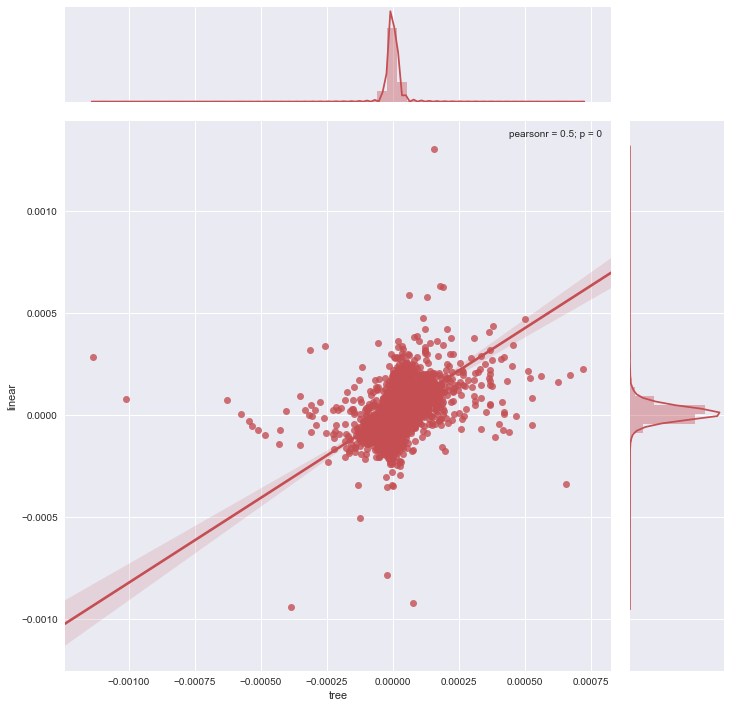

In [19]:
g = sns.jointplot("tree", "linear", data=to_compare, kind="reg", color="r", size=10)

In [ ]:
r2_score()

In [312]:
r_squares = []
for day in data['day'].unique():
    by_day = data.loc[data['day']==day]
    r_squares.append(r2_score(by_day['y_test'], by_day['predicted']))

In [313]:
grouped_error1 = grouped_error1.to_frame()
grouped_error1['r2'] = r_squares

In [242]:
grouped_error2 = grouped_error2.to_frame()
grouped_error2['r2'] = r_squares

/home/gleb/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=1,center=False).mean()
  from ipykernel import kernelapp as app


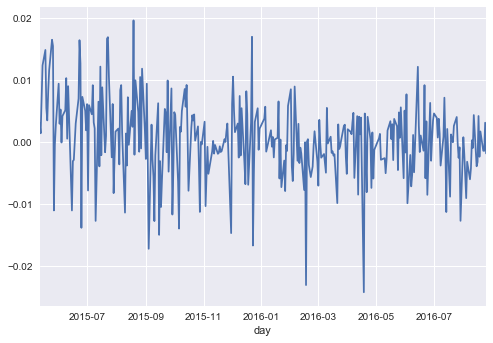

In [309]:
# 25 days
days_25 = pd.rolling_mean(grouped_error1['r2'], window=1)
days_25.loc[datetime(2015,5,12).date():].plot()

/home/gleb/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  from ipykernel import kernelapp as app


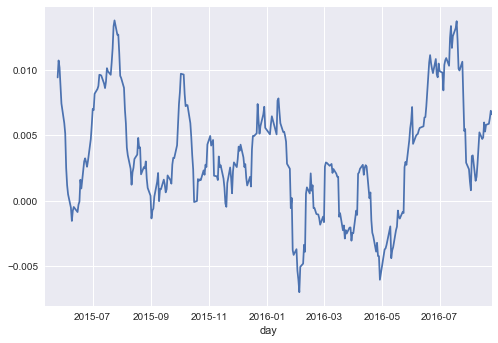

In [314]:
# 125 days tree
days_125 = pd.rolling_mean(grouped_error1['r2'], window=10)
days_125.plot()

/home/gleb/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  from ipykernel import kernelapp as app


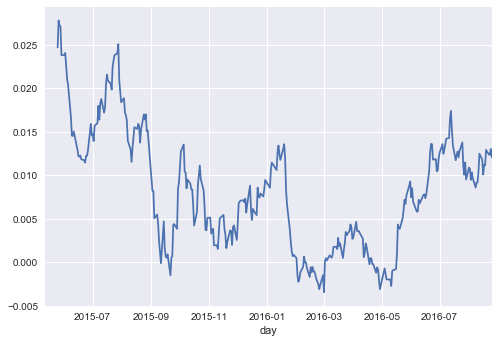

In [298]:
# 125 days linear
days_125 = pd.rolling_mean(grouped_error1['r2'], window=10)
days_125.plot()

/home/gleb/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  if __name__ == '__main__':


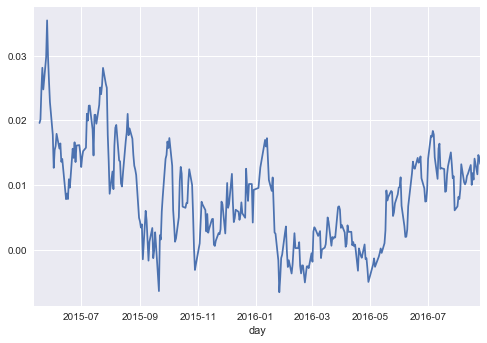

In [284]:
# 125 days
pd.rolling_mean(grouped_error1['r2'], window=5).plot()

/home/gleb/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  if __name__ == '__main__':


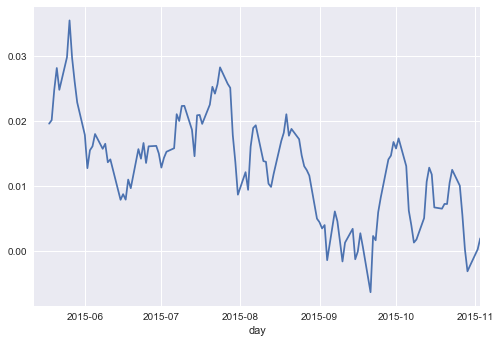

In [290]:
pd.rolling_mean(grouped_error1['r2'], window=5).plot()

In [226]:
grouped_error2 = data2.groupby('day')['error'].mean()

In [311]:
grouped_error1 = data.groupby('day')['error'].mean()

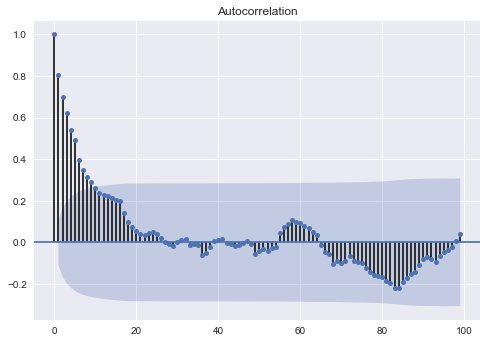

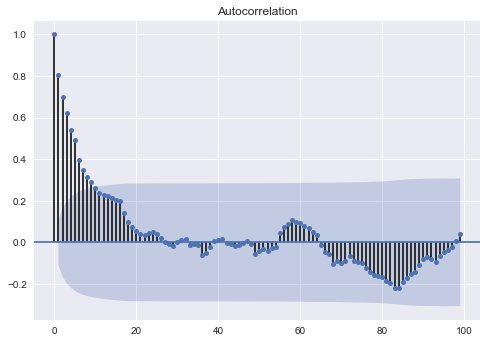

In [272]:
plot_acf(grouped_error1, lags=np.arange(100), zero=False)

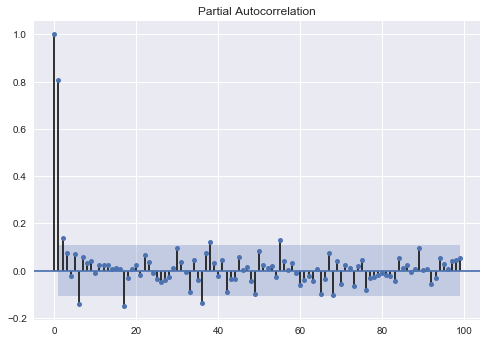

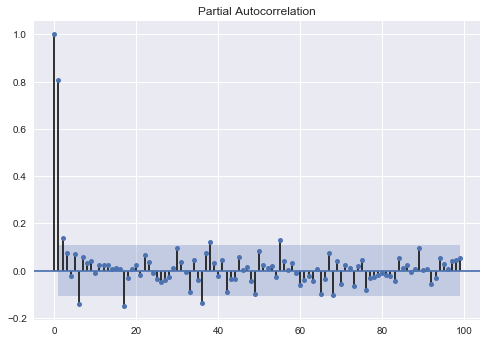

In [273]:
plot_pacf(grouped_error1, lags=np.arange(100), zero=False)

In [274]:
from statsmodels.tsa.stattools import arma_order_select_ic

In [275]:
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot


In [276]:
arma_mod20 = sm.tsa.ARMA(grouped_error, (1,0)).fit()

In [277]:
arma_mod20.params

const          0.00032
ar.L1.error    0.77595
dtype: float64

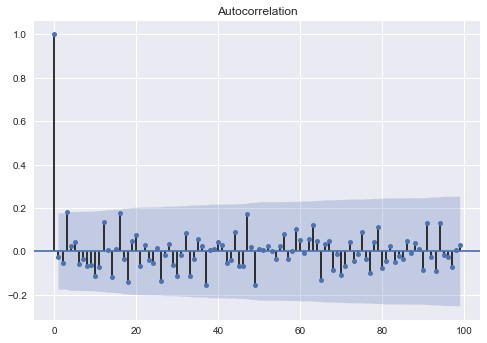

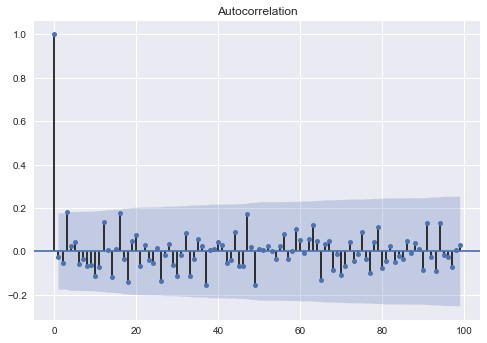

In [278]:
plot_acf(arma_mod20.resid, lags=np.arange(100), zero=False)

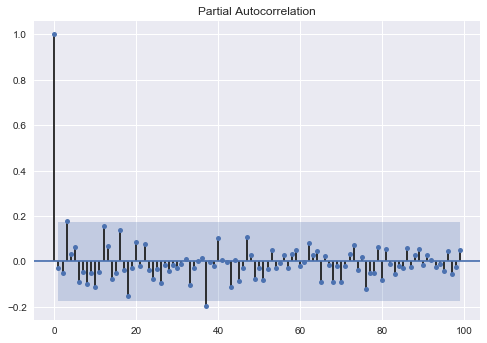

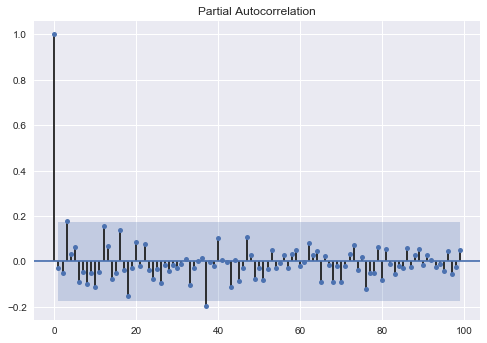

In [279]:
plot_pacf(arma_mod20.resid, lags=np.arange(100), zero=False)

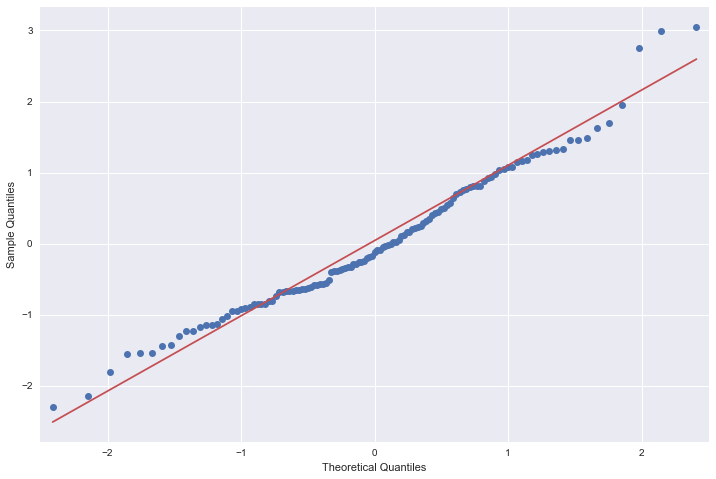

In [280]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(arma_mod20.resid, line='q', ax=ax, fit=True)

In [281]:
arma_order_select_ic(grouped_error)

/home/gleb/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/gleb/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/gleb/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/gleb/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


{'bic':              0            1            2
 0 -1938.372128 -2010.123551 -2017.200394
 1 -2050.676578 -2046.179668 -2041.863742
 2 -2046.110552 -2041.373924 -2038.333154
 3 -2042.429164 -2040.044601 -2032.778111
 4 -2041.386437 -2035.937274 -2031.137841, 'bic_min_order': (1, 0)}

In [95]:
pd.merge(grouped_error1.to_frame(), grouped_error2.to_frame(), left_index=True, right_index=True)

,error_x,error_y
day,,
2015-05-12,0.000340,0.000340
2015-05-13,0.000414,0.000419
2015-05-14,0.000412,0.000412
2015-05-15,0.000245,0.000248
2015-05-18,0.000323,0.000329
2015-05-19,0.000335,0.000337
2015-05-20,0.000266,0.000269
2015-05-21,0.000295,0.000295
2015-05-22,0.000203,0.000204


In [107]:
data['predicted_true'].describe()

count    63877.000000
mean         0.081610
std          0.978922
min         -1.000000
25%         -1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: predicted_true, dtype: float64

In [88]:
data['return'].describe()

count    63877.000000
mean         0.000040
std          0.000463
min         -0.005872
25%         -0.000178
50%          0.000032
75%          0.000259
max          0.006159
Name: return, dtype: float64

In [86]:
data['net_return'].describe()

count    63877.000000
mean         0.000010
std          0.000463
min         -0.005902
25%         -0.000208
50%          0.000002
75%          0.000229
max          0.006129
Name: net_return, dtype: float64

In [89]:
0.000040 * 60

0.0024000000000000002

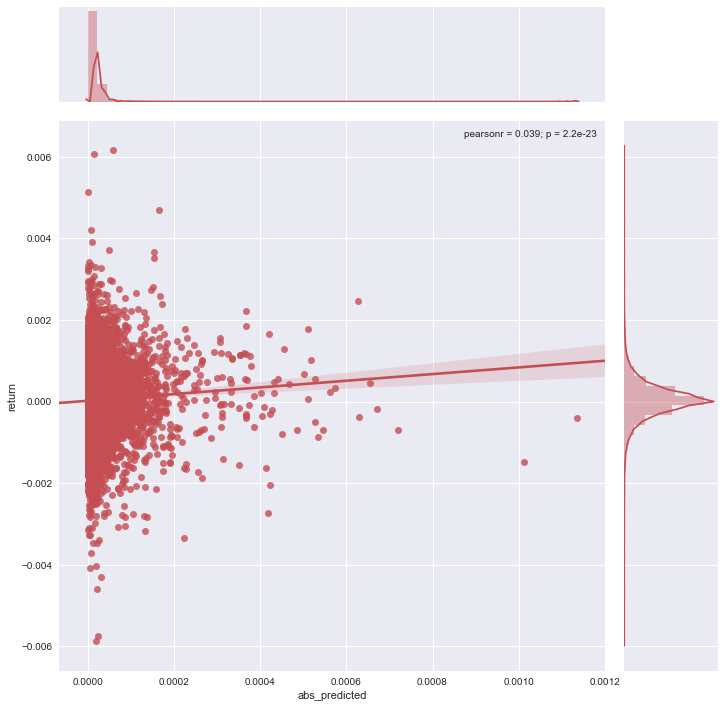

In [111]:
g = sns.jointplot("abs_predicted", "return", data=data, kind="reg", color="r", size=10)

In [258]:
data['abs_predicted'].describe()

count    60755.000000
mean         0.000099
std          0.000093
min          0.000000
25%          0.000034
50%          0.000073
75%          0.000135
max          0.001958
Name: abs_predicted, dtype: float64

In [266]:
for_thr = []
for threshold in np.linspace(0.0, data['abs_predicted'].max(),300):
    mean_with_costs = data.loc[data['abs_predicted']>=threshold, 'net_return'].mean()
    return_std = data.loc[data['abs_predicted']>=threshold, 'net_return'].std()
    total_return = data.loc[data['abs_predicted']>=threshold, 'net_return'].sum()
    n_deals = data.loc[data['abs_predicted']>=threshold, 'net_return'].count()
    daily = data.loc[data['abs_predicted']>=threshold].groupby('day')['net_return'].mean().loc[data['day'].unique()].fillna(0.0)
    sharpe = daily.mean()*np.sqrt(240)/daily.std()
    for_thr.append([threshold, mean_with_costs, return_std, sharpe, total_return, n_deals])
for_thr = pd.DataFrame(for_thr, columns=['threshold', 'mean', 'std', 'sharpe', 'total', 'n'])
for_thr = for_thr.loc[(for_thr['n']>10) & (for_thr['threshold']>0.02/100)]
for_thr['upper'] = for_thr['mean'] + for_thr['std']
for_thr['lower'] = for_thr['mean'] - for_thr['std']
for_thr.set_index('threshold', inplace=True)

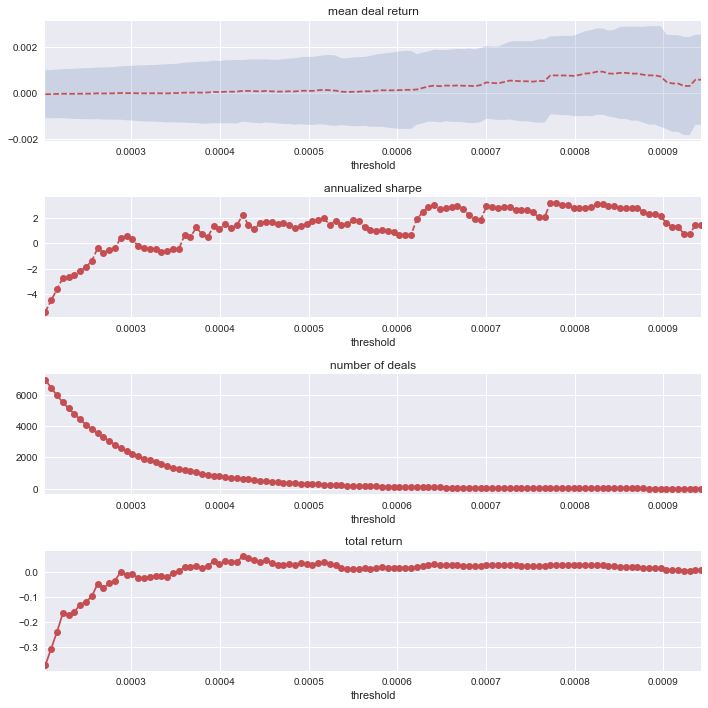

In [267]:
fig,ax = plt.subplots(4, 1, figsize=(10,10))
for_thr['mean'].plot(ax=ax[0], color='r', linestyle='--')
ax[0].fill_between(for_thr.index, for_thr['lower'], for_thr['upper'], alpha=0.2)
ax[0].set_title('mean deal return')
for_thr['sharpe'].plot(ax=ax[1], color='r', linestyle='--', marker='o')
ax[1].set_title('annualized sharpe')
for_thr['n'].plot(ax=ax[2], color='r', linestyle='-', marker='o')
ax[2].set_title('number of deals')
for_thr['total'].plot(ax=ax[3], color='r', linestyle='-', marker='o')
ax[3].set_title('total return')
fig.tight_layout()

In [195]:
to_compare = pd.DataFrame()
to_compare['tree'] = data2['predicted']
to_compare['linear'] = data['predicted']
to_compare['true'] = data['y_test']
to_compare['day'] = data['day']
to_compare = pd.merge(to_compare, grouped_error1.shift(1).reset_index(), 
                      on='day').rename(columns={'error':'linear_error_lag1'})
to_compare = pd.merge(to_compare, grouped_error1.shift(2).reset_index(), 
                      on='day').rename(columns={'error':'linear_error_lag2'})
to_compare = pd.merge(to_compare, grouped_error2.shift(1).reset_index(), 
                      on='day').rename(columns={'error':'tree_error_lag1'})
to_compare = pd.merge(to_compare, grouped_error2.shift(2).reset_index(), 
                      on='day').rename(columns={'error':'tree_error_lag2'})
to_compare.dropna(inplace=True)

In [196]:
to_compare.head()

,tree,linear,true,day,linear_error_lag1,linear_error_lag2,tree_error_lag1,tree_error_lag2
1026,0.000018,0.000184,0.000320,2015-05-14,0.000414,0.00034,0.000419,0.00034
1027,0.000003,0.000021,-0.000980,2015-05-14,0.000414,0.00034,0.000419,0.00034
1028,0.000265,0.000211,-0.001881,2015-05-14,0.000414,0.00034,0.000419,0.00034
1029,0.000266,0.000148,0.001023,2015-05-14,0.000414,0.00034,0.000419,0.00034
1030,0.000235,0.000148,0.001182,2015-05-14,0.000414,0.00034,0.000419,0.00034


In [197]:
mean_squared_error(to_compare['tree'], y)

2.1343474708741389e-07

In [198]:
mean_squared_error(to_compare['linear'], y)

2.1194442516047713e-07

In [199]:
y = to_compare['true']
del to_compare['true']
X = to_compare
del X['day']

In [200]:
X.head()

,tree,linear,linear_error_lag1,linear_error_lag2,tree_error_lag1,tree_error_lag2
1026,0.000018,0.000184,0.000414,0.00034,0.000419,0.00034
1027,0.000003,0.000021,0.000414,0.00034,0.000419,0.00034
1028,0.000265,0.000211,0.000414,0.00034,0.000419,0.00034
1029,0.000266,0.000148,0.000414,0.00034,0.000419,0.00034
1030,0.000235,0.000148,0.000414,0.00034,0.000419,0.00034


In [201]:
from sklearn.linear_model import ElasticNetCV,RidgeCV,LinearRegression, SGDRegressor
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [203]:
model = ElasticNetCV(l1_ratio=[0.001, 0.005, .01, .03, .05, .07, .1, .5, .9], cv=TimeSeriesSplit(3), n_jobs=-1, normalize=True, fit_intercept=False)

In [204]:
model.fit(X_train, y_train)

/home/gleb/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNetCV(alphas=None, copy_X=True, cv=TimeSeriesSplit(n_splits=3),
       eps=0.001, fit_intercept=False,
       l1_ratio=[0.001, 0.005, 0.01, 0.03, 0.05, 0.07, 0.1, 0.5, 0.9],
       max_iter=1000, n_alphas=100, n_jobs=-1, normalize=True,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

In [205]:
r2_score(y_test, X_test['linear'])

0.012394136439380032

In [206]:
import xgboost as xgb


In [216]:
param = {'max_depth': 1, 'min_child_weight': 5, 'eta': 0.1, 
         'silent': 1, 'objective': 'reg:linear',
         'subsample': 0.9, 'colsample_bytree': 1.0, 'colsample_bylevel': 1.0}
dtrain = xgb.DMatrix(X_train, y_train)

In [217]:
cv = xgb.cv(param, dtrain, num_boost_round=120, nfold=5, metrics={'rmse'})

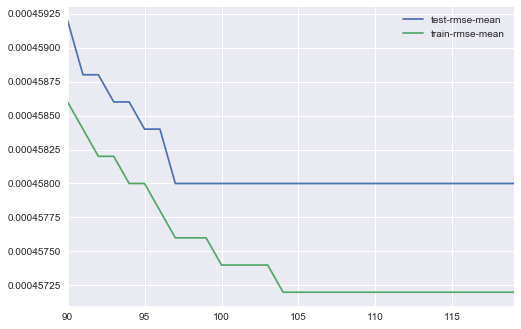

In [218]:
cv.loc[90:, ['test-rmse-mean', 'train-rmse-mean']].plot()

In [219]:
model = xgb.train(param, dtrain, num_boost_round=100)
dtest = xgb.DMatrix(X_test, y_test)

In [220]:
r2_score(y_test, model.predict(dtest))

0.012404449074611246

In [221]:
r2_score(y_test, X_test['linear'])

0.012394136439380032

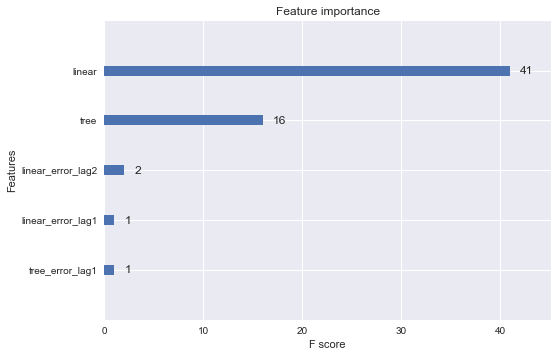

In [222]:
xgb.plot_importance(model)